# Alucar - Analisando vendaS

In [142]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import seaborn as sns
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
alucar = pd.read_csv('alucar.csv')

In [4]:
print(f"Quantidade de linhas e colunas: {alucar.shape}")

Quantidade de linhas e colunas: (24, 2)


In [5]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [6]:
print(f"Quantidade de dados nulos: {alucar.isna().sum().sum()}") # Aqui temos a somatoria dos dados nulos no mes e vendas juntos com o sum + sum

Quantidade de dados nulos: 0


In [8]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [9]:
# Convertendo mês para datetime
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [12]:
print(sns.__version__)

0.11.2


<AxesSubplot:xlabel='mes', ylabel='vendas'>

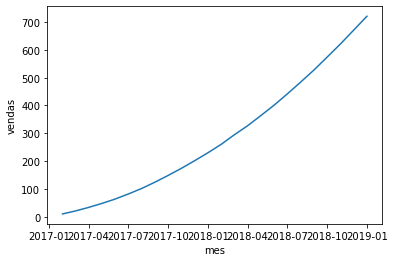

In [17]:
sns.lineplot(x='mes', y='vendas', data=alucar) # Grafico das vendas

## Aperfeiçoando o gráfico visualmente

In [21]:
sns.set_palette('Accent')
sns.set_style('darkgrid')

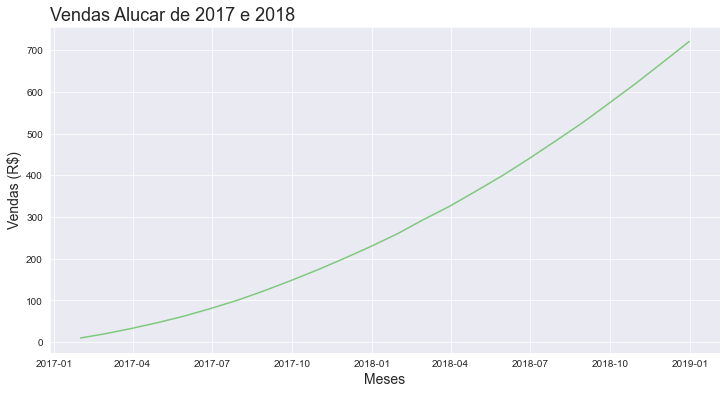

In [32]:
ax = sns.lineplot(x='mes', y='vendas', data=alucar) # Armazenou em uma variavel o titulo feio some
ax.figure.set_size_inches(12, 6)
ax.set_title('Vendas Alucar de 2017 e 2018 ', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Vendas (R$)', fontsize=14)
ax = ax # sumiu o text

Time series é uma coleção de observações ou dados, geralmente feita através de um tempo sequencial, que pode ser segundos, minutos, dias, meses, anos, entre outros.

# Decomposição e autocorrelação

In [35]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


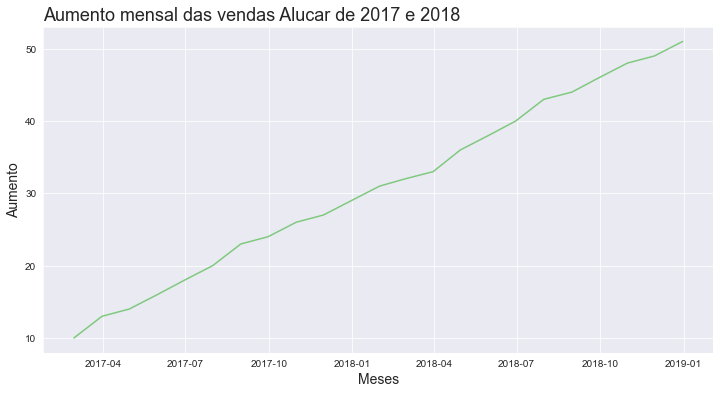

In [37]:
ax = sns.lineplot(x='mes', y='aumento', data=alucar) # Armazenou em uma variavel o titulo feio some
ax.figure.set_size_inches(12, 6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018 ', loc='left', fontsize=18)
ax.set_xlabel('Meses', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax # sumiu o text

In [38]:
def plotar(titulo, labelx, labely, x, y, dataset):
    ax = sns.lineplot(x=x, y=y, data=dataset) # Armazenou em uma variavel o titulo feio some
    ax.figure.set_size_inches(12, 6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax # sumiu o text

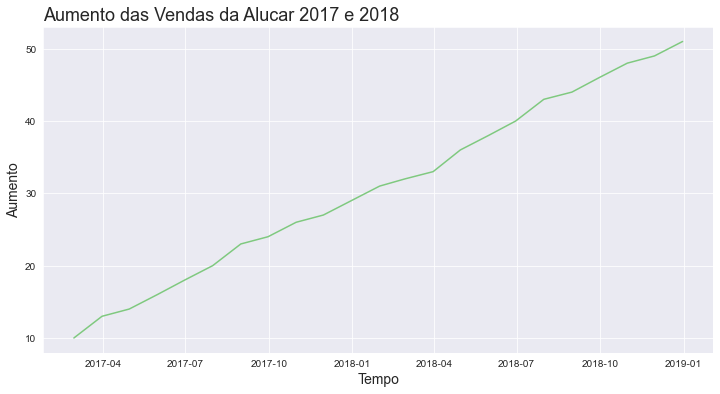

In [39]:
plotar('Aumento das Vendas da Alucar 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [40]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


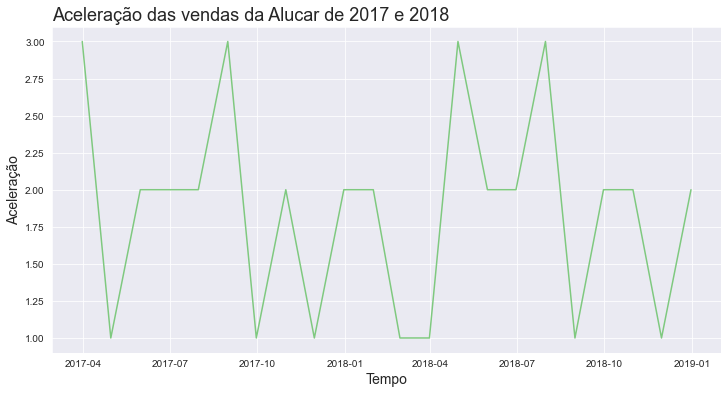

In [41]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

Jamais tivemos 1 aceleração negativa, decompondo o gráfico com a aceleração das vendas conseguimos ver isso, e entender melhor da time series.

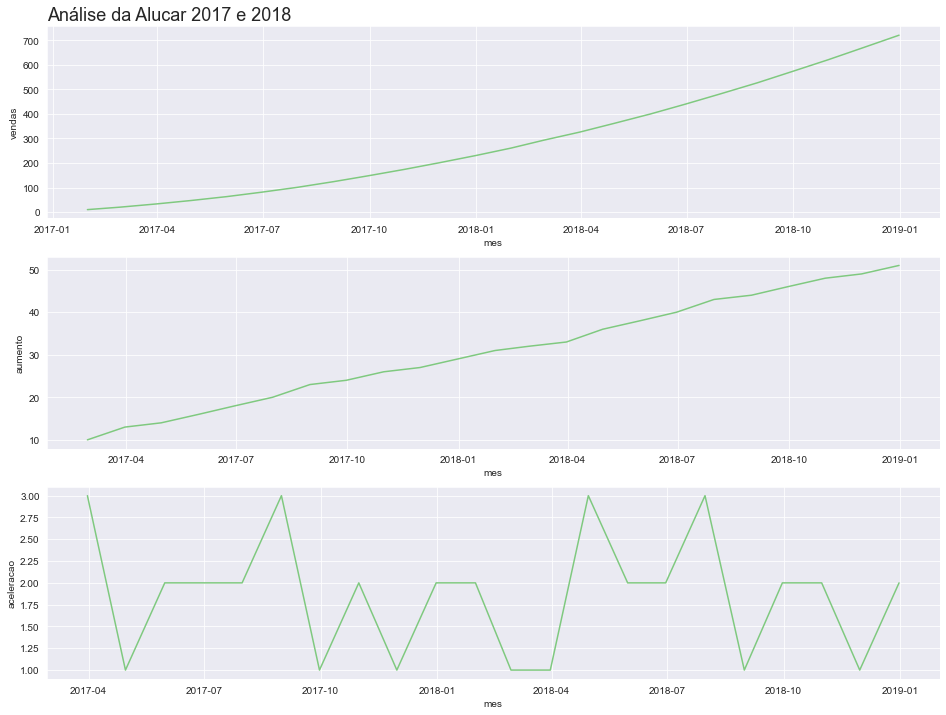

In [43]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise da Alucar 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='aumento', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax=ax

In [45]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

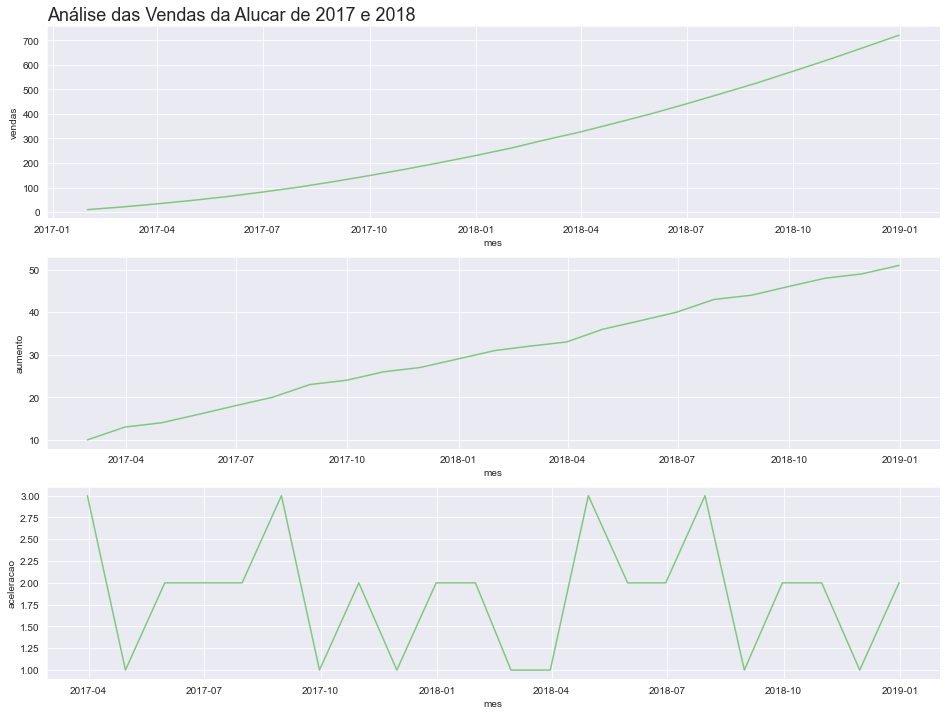

In [46]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', alucar, 'Análise das Vendas da Alucar de 2017 e 2018')

### Autocorrelação

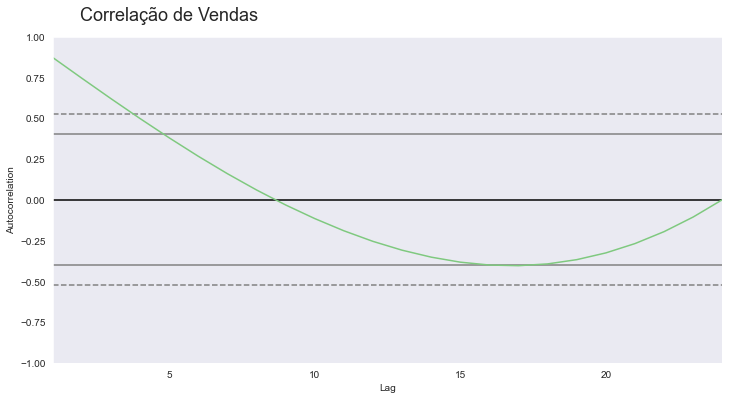

In [54]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação de Vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

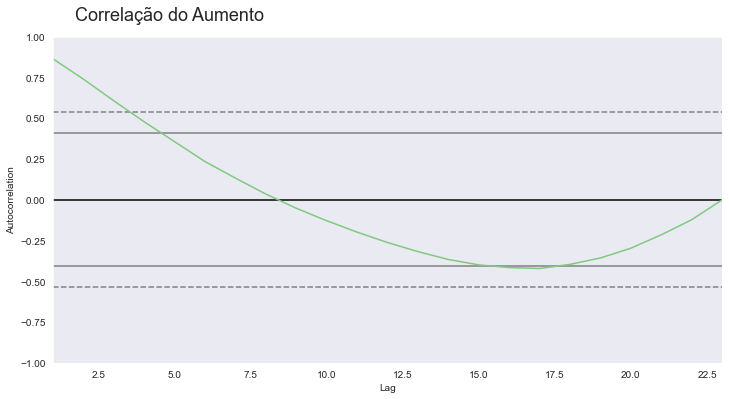

In [57]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do Aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

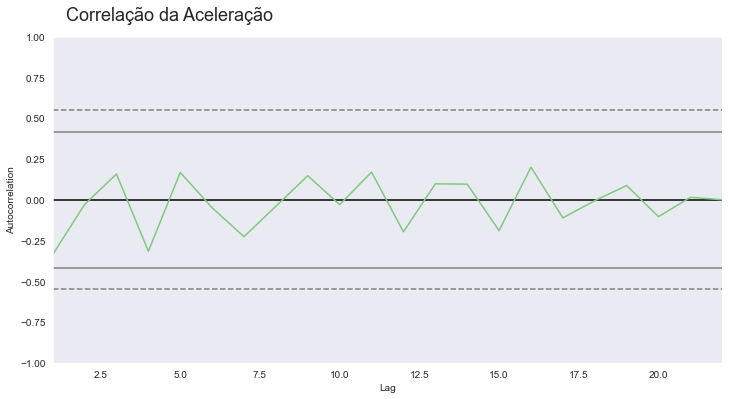

In [58]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação da Aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

# Importância da decomposição e sazonalidade

## Alucar - Analisando assinantes da newsletter

In [82]:
assinantes = pd.read_csv('newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [83]:
print(f"Quantidade de linhas e colunas: {assinantes.shape}" )
print(f"Quantidade de dados nulos: {assinantes.isna().sum().sum()}")

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [84]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [85]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


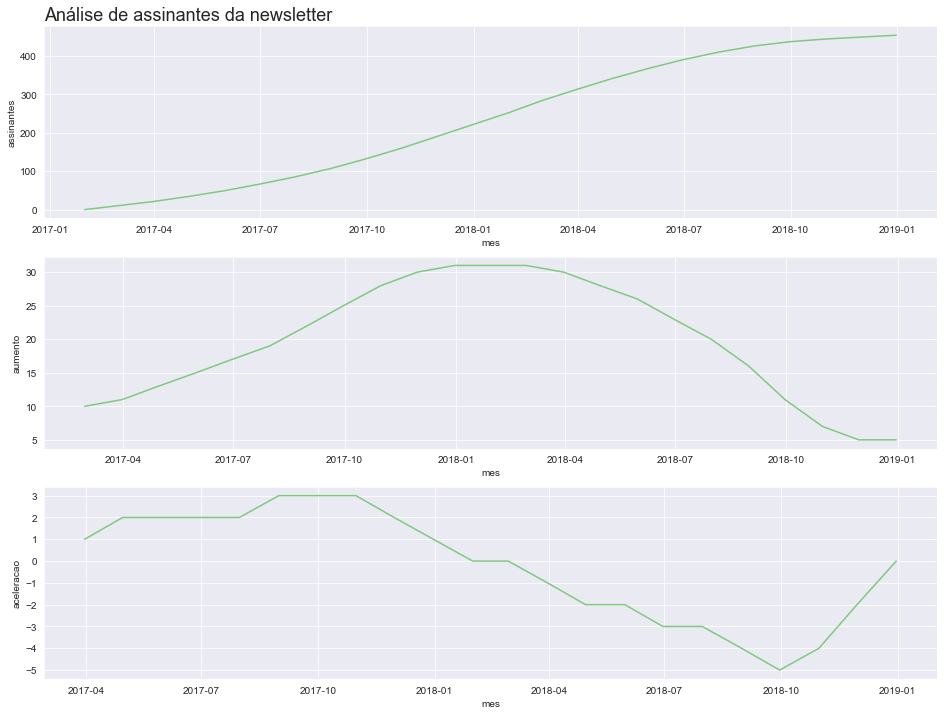

In [86]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# Chocolura - Analisando as vendas

In [87]:
chocolura = pd.read_csv('chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [89]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [90]:
print(f"Quantidade de linhas e colunas: {chocolura.shape}" )
print(f"Quantidade de dados nulos: {chocolura.isna().sum().sum()}")

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


In [91]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


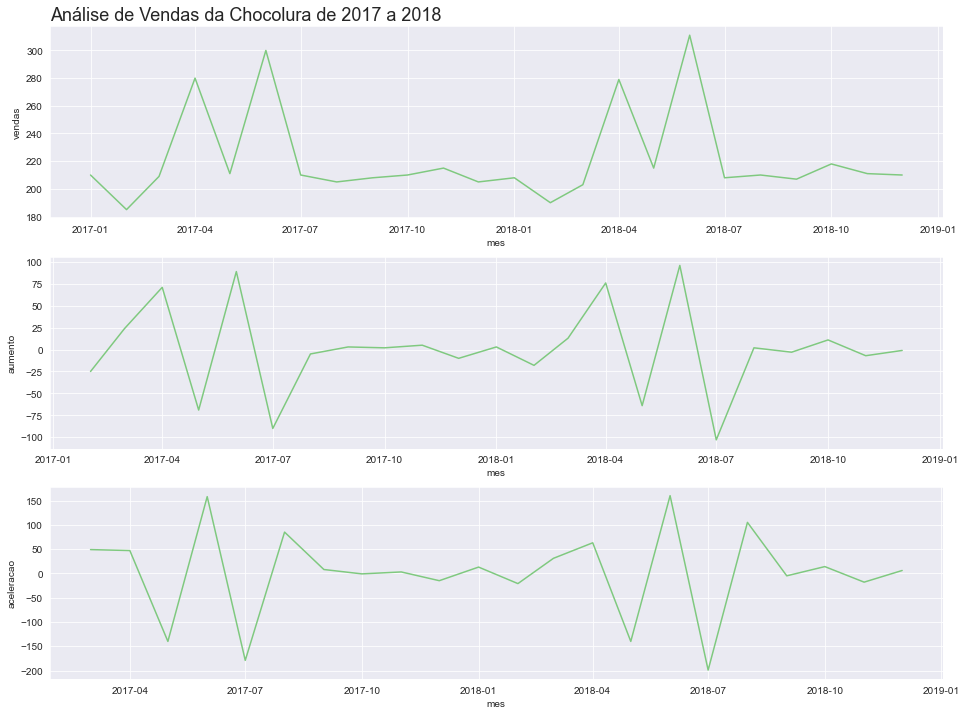

In [92]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de Vendas da Chocolura de 2017 a 2018')

## Chocolura - Vendas diárias (Outubro e Novembro)

In [94]:
vendas_por_dia = pd.read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [95]:
print(f"Quantidade de linhas e colunas: {vendas_por_dia.shape}" )
print(f"Quantidade de dados nulos: {vendas_por_dia.isna().sum().sum()}")

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [96]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [97]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


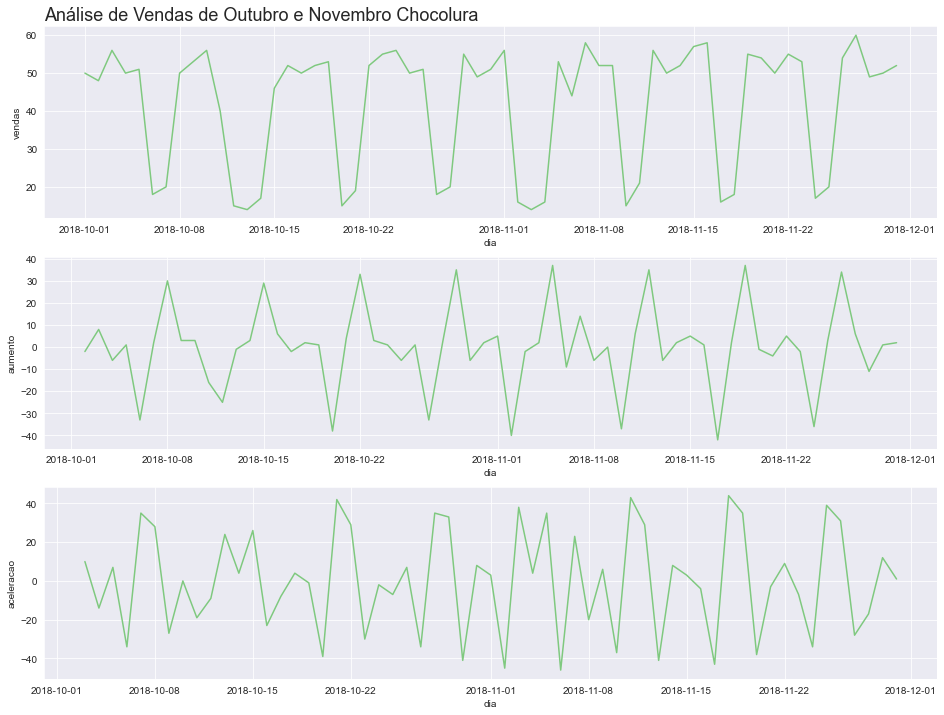

In [98]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de Vendas de Outubro e Novembro Chocolura')

**Analizando a sazonalidade**

In [103]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [105]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [106]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [107]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


## Agrupando os dias (Média de todos os dias da semana)

In [117]:
list_ = ['vendas', 'aumento', 'aceleracao']
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')[list_].mean().round()

In [118]:
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das vendas diárias**

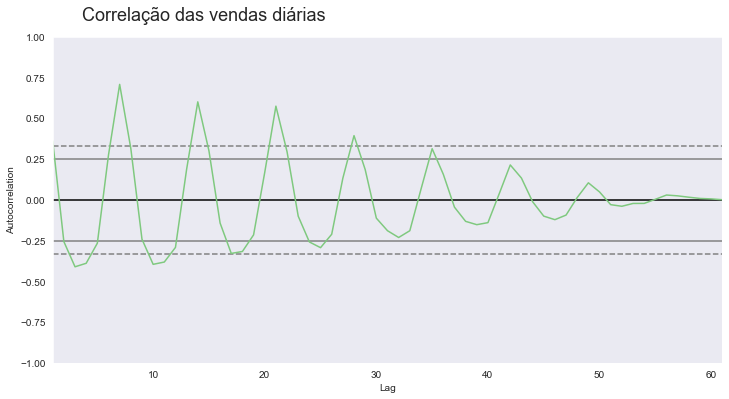

In [119]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

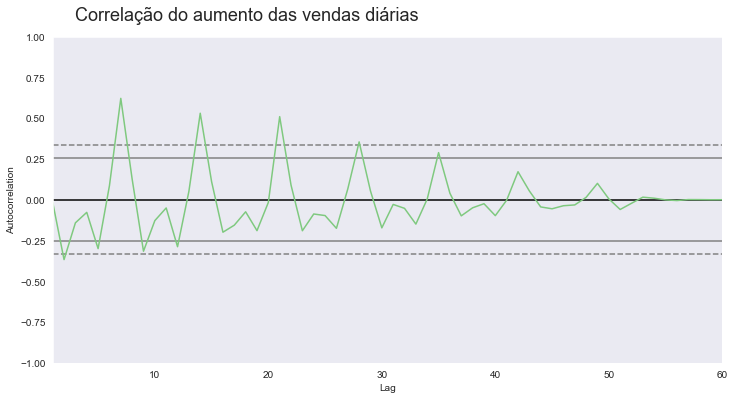

In [121]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

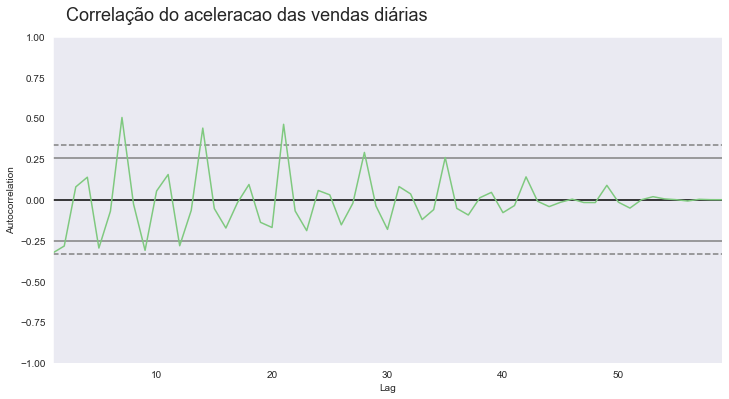

In [122]:
ax = plt.figure(figsize=(12, 6))
ax.suptitle('Correlação do aceleracao das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

# Cafelura - Análise de Vendas

In [123]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [124]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [126]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [128]:
print(f"Quantidade de linhas e colunas: {cafelura.shape}" )
print(f"Quantidade de dados nulos: {cafelura.isna().sum().sum()}")

Quantidade de linhas e colunas: (24, 2)
Quantidade de dados nulos: 0


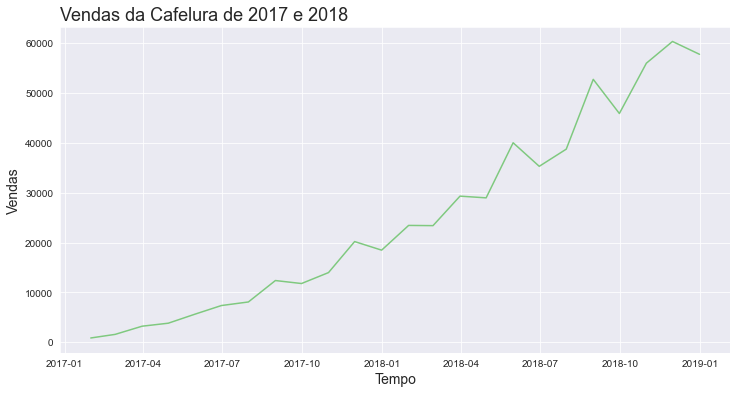

In [129]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [132]:
quantidade_de_dias_de_fds = pd.read_csv('dias_final_de_semana.csv')
quantidade_de_dias_de_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [133]:
quantidade_de_dias_de_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [135]:
cafelura['vendas_normalizadas'] = (cafelura['vendas']) / (quantidade_de_dias_de_fds['quantidade_de_dias'].values)
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


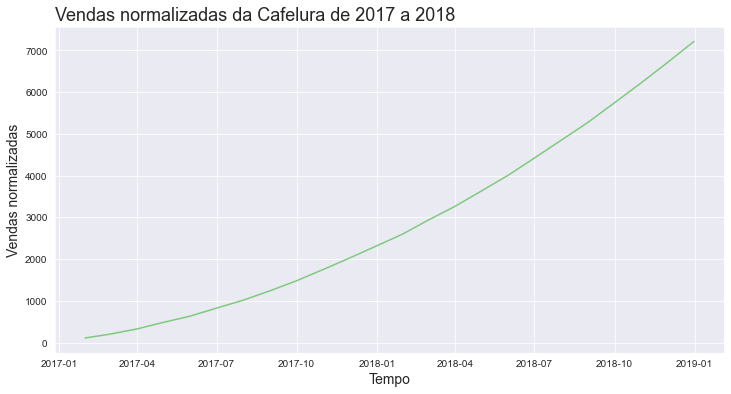

In [136]:
plotar('Vendas normalizadas da Cafelura de 2017 a 2018', 'Tempo', 'Vendas normalizadas', 'mes', 'vendas_normalizadas', cafelura)

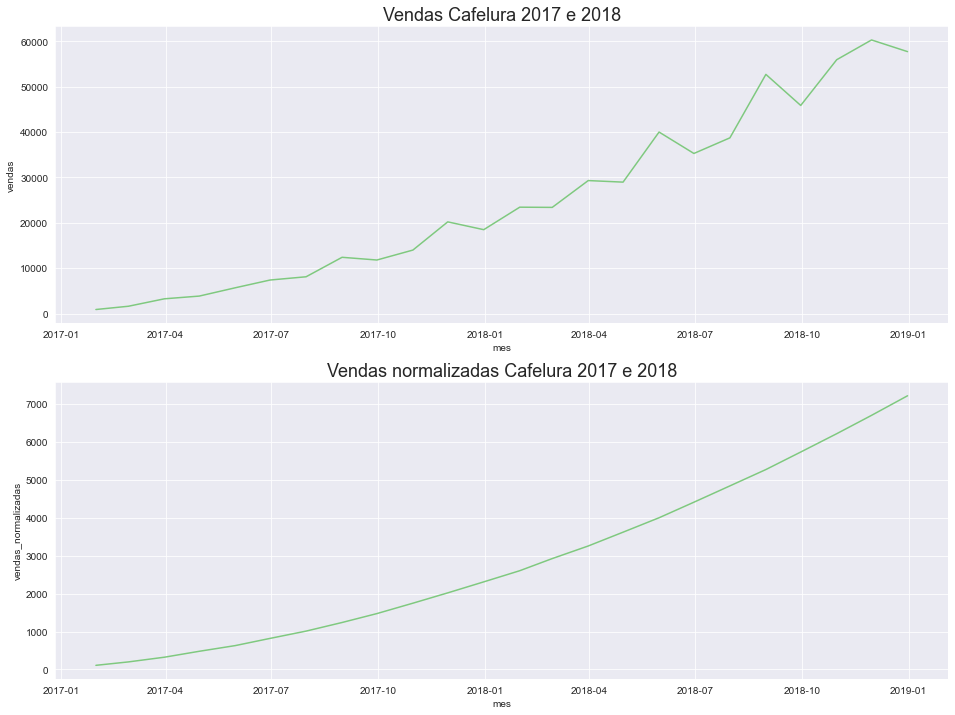

In [140]:
plt.figure(figsize=(16,12))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax

A sazonalidade se refere a um padrão repetitivo dentro de um período fixo de tempo.
Sempre que for analisar um time series é importante avaliar tendência, sazonalidade e ruído.
Como ver isso de uma vez somente?

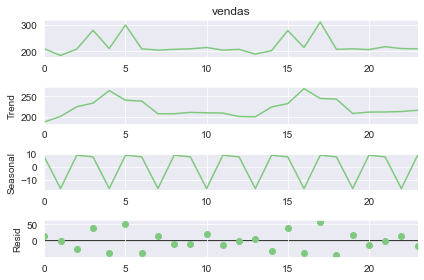

In [162]:
resultado = seasonal_decompose(x=chocolura['vendas'], extrapolate_trend='freq', period=3)
ax = resultado.plot()

In [163]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [168]:
data = ({
    'observacao' : observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,187.777778,7.692130,14.530093
1,185.0,201.333333,-16.668981,0.335648
2,209.0,224.666667,8.976852,-24.643519
3,280.0,233.333333,7.692130,38.974537
4,211.0,263.666667,-16.668981,-35.997685


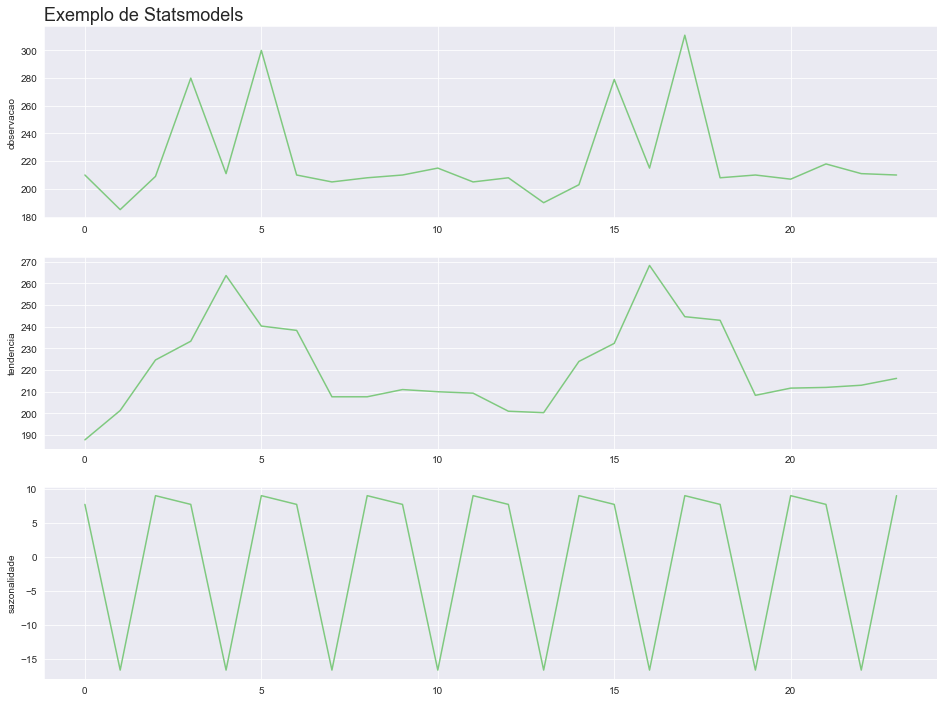

In [169]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

# Alucel - Análise de vendas

In [170]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [171]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [172]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [173]:
print(f"Quantidade de linhas e colunas: {alucel.shape}" )
print(f"Quantidade de dados nulos: {alucel.isna().sum().sum()}")

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [174]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

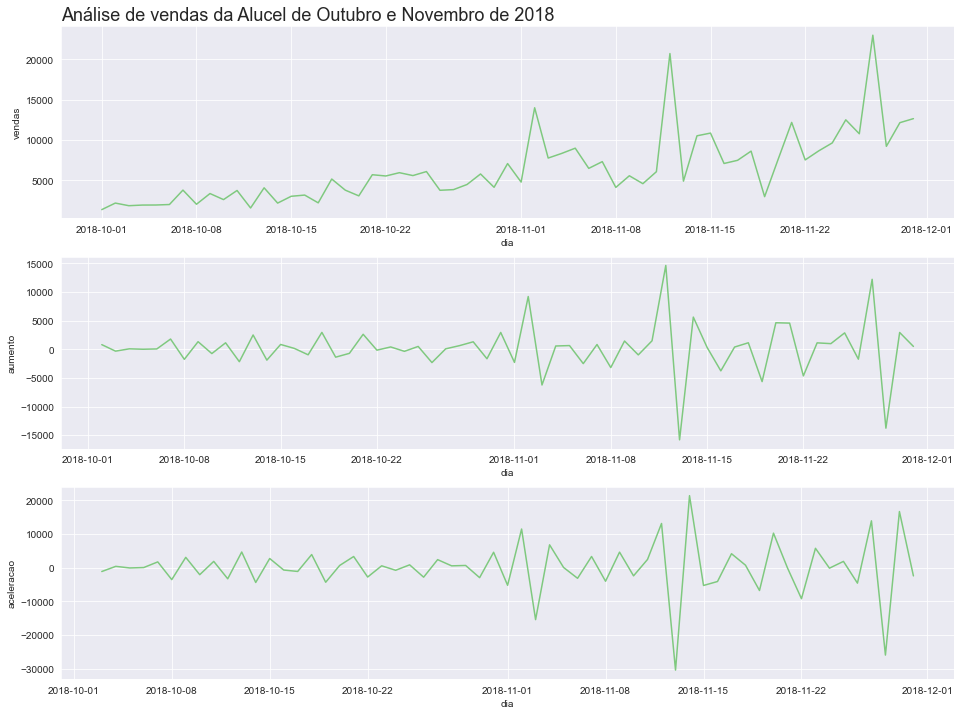

In [175]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média Móvel**

In [176]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()

In [178]:
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


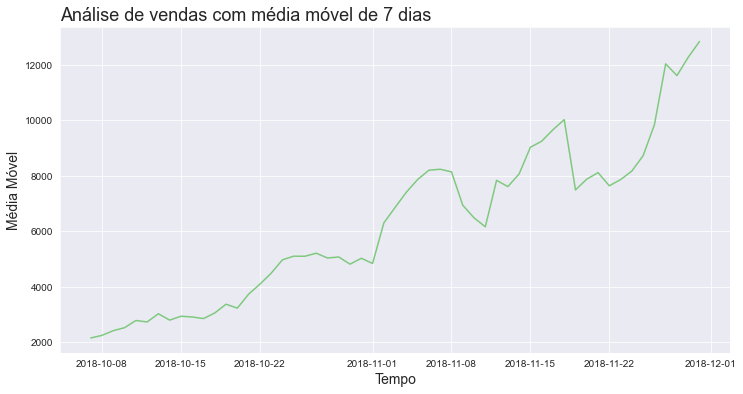

In [179]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [180]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

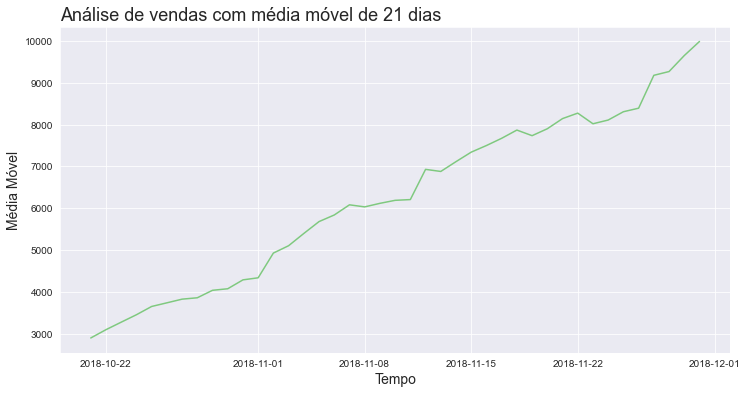

In [181]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel) # Nao fazer isso pq perder muita informacao com uma media movel grande demais

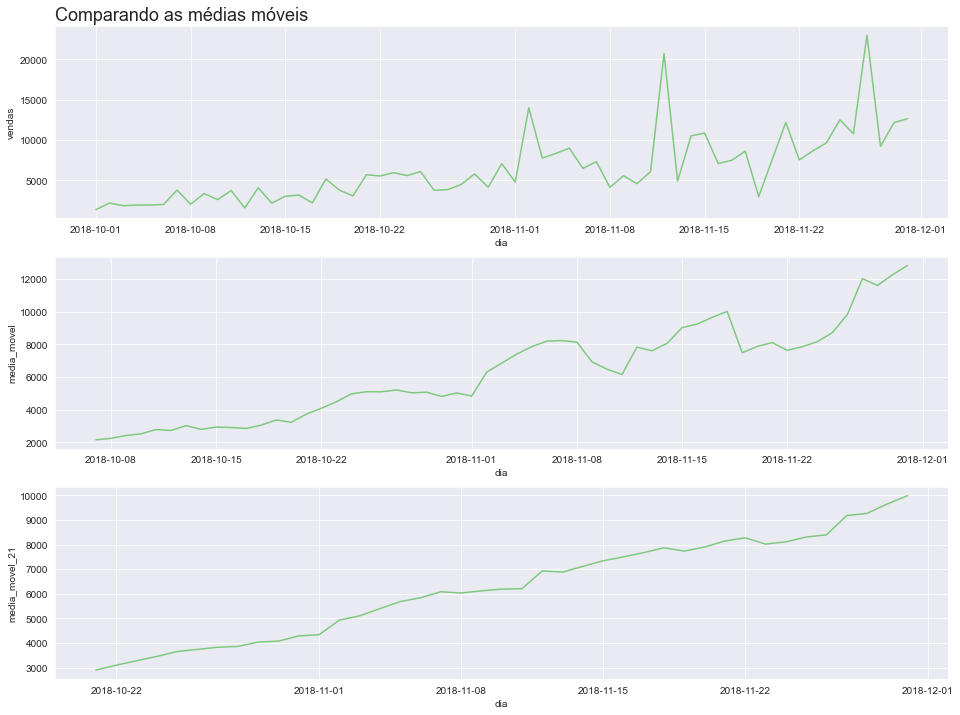

In [182]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')